# Clustering and Fitting

##### Dataset link:https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009

### Student ID:23004934

### Importing Libraries:

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import mean_squared_error, r2_score

##### Data Loading and Initial Exploration

In [56]:
# Load the dataset
wine_data_path = 'wineqtred.csv'
df_wine = pd.read_csv(wine_data_path)
df_wine.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [57]:
df_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [58]:
# Display the first few rows of the dataframe and some basic info
df_wine_info = df_wine.info()
df_wine_head = df_wine.head()

df_wine_info, df_wine_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


(None,
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 0            7.4              0.70         0.00             1.9      0.076   
 1            7.8              0.88         0.00             2.6      0.098   
 2            7.8              0.76         0.04             2.3      0.092   
 3           11.2              0.28         0.56             1.9      0.075   
 4            7.4              0.70         0.00             1.9      0.076   
 
    free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
 0                 11.0                  34.0   0.9978  3.51       0.56   
 1                 25.0                  67.0   0.9968  3.20       0.68   
 2                 15.0                  54.0   0.9970  3.26       0.65   
 3                 17.0                  60.0   0.9980  3.16       0.58   
 4                 11.0                  34.0   0.9978  3.51       0.56   
 
    alcohol  quality  
 0      9.4        5  
 1      9.8        

In [59]:
# Creating a DataFrame with fabricated data
data = {
    'alcohol': [12.3, 10.5, 11.2, 9.7, 13.1],
    'density': [0.998, 0.995, 0.997, 0.992, 1.001],
    'quality': [5, 6, 7, 5, 8]
}

wine_df = pd.DataFrame(data)

# Display the DataFrame
print(df_wine)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [60]:
def explore_data(data):
    """
    Explores the dataset by displaying major moments, correlation matrix, and basic statistics.

    Parameters:
        data (DataFrame): Input dataset.

    Returns:
        None
    """
    # Display major moments
    moments = pd.DataFrame({
        'Mean': data.mean(),
        'Median': data.median(),
        'Standard Deviation': data.std(),
        'Skewness': data.skew(),
        'Kurtosis': data.kurtosis()
    })
    print("Major Moments:")
    print(moments)
    print("\n")
    
    # Correlation matrix
    corr_matrix = data.corr()
    print("Correlation Matrix:")
    print(corr_matrix)
    print("\n")
    
    # Basic statistics
    basic_stats = data.describe()
    print("Basic Statistics:")
    print(basic_stats)

# Explore the wine dataset
explore_data(df_wine)

Major Moments:
                           Mean    Median  Standard Deviation  Skewness  \
fixed acidity          8.319637   7.90000            1.741096  0.982751   
volatile acidity       0.527821   0.52000            0.179060  0.671593   
citric acid            0.270976   0.26000            0.194801  0.318337   
residual sugar         2.538806   2.20000            1.409928  4.540655   
chlorides              0.087467   0.07900            0.047065  5.680347   
free sulfur dioxide   15.874922  14.00000           10.460157  1.250567   
total sulfur dioxide  46.467792  38.00000           32.895324  1.515531   
density                0.996747   0.99675            0.001887  0.071288   
pH                     3.311113   3.31000            0.154386  0.193683   
sulphates              0.658149   0.62000            0.169507  2.428672   
alcohol               10.422983  10.20000            1.065668  0.860829   
quality                5.636023   6.00000            0.807569  0.217802   

         

##### Data Visualization

In [61]:
# Normalize the data for clustering
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features = wine_df.columns[:-1]  # Assuming the last column is 'quality'
df_wine_scaled = scaler.fit_transform(df_wine[features])

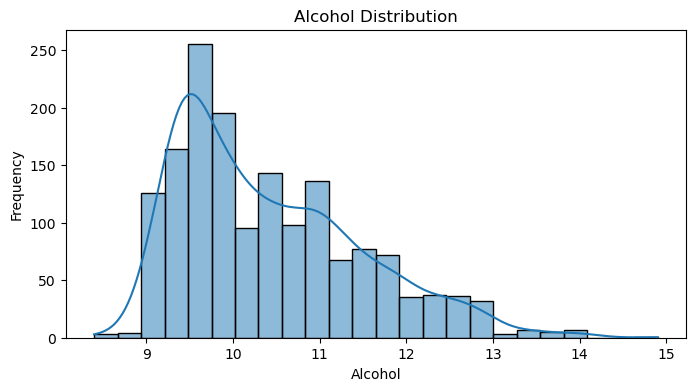

In [62]:
# Histogram for the 'alcohol' distribution
plt.figure(figsize=(8, 4))
sns.histplot(df_wine['alcohol'], kde=True)
plt.title('Alcohol Distribution')
plt.xlabel('Alcohol')
plt.ylabel('Frequency')
plt.show()

###### A histogram is plotted to visualize the distribution of wine quality ratings in the dataset.

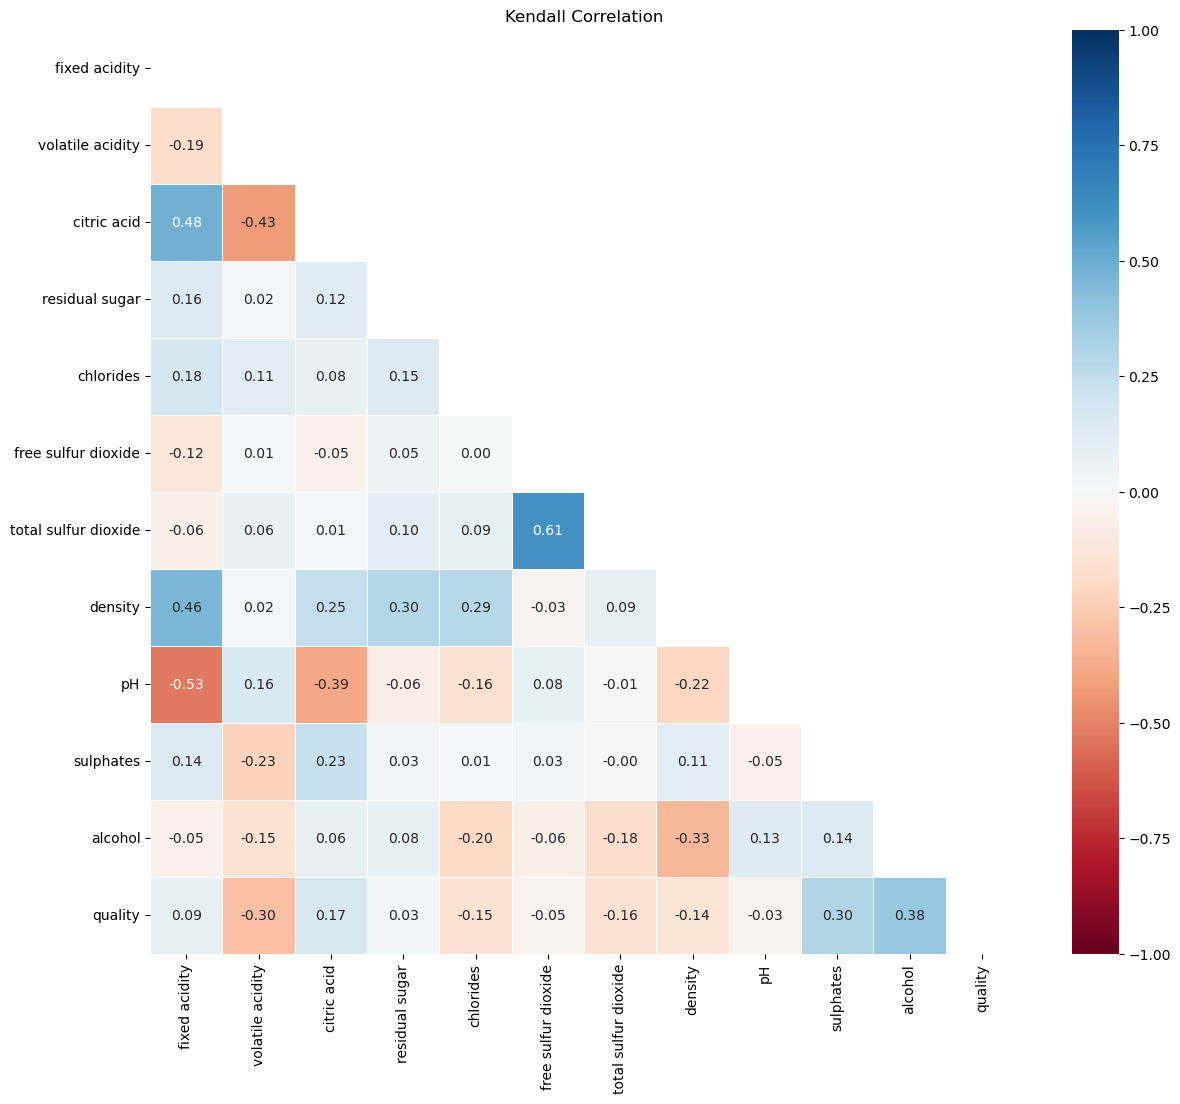

In [63]:
def plot_wine_correlation(df, method):
    """
    Plots correlation of wine features using different methods.

    Parameters:
        df (DataFrame): Input DataFrame containing the wine dataset.
        method (str): Method for calculating correlation ('pearson', 'kendall', or 'spearman').

    Returns:
        None
    """
    # Create a correlation matrix
    corr_matrix = df.corr(method=method)

    # Plotting the correlation heatmap 
    plt.figure(figsize=(14, 12))
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    cmap = sns.color_palette("RdBu", as_cmap=True)
    sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmin=-1, vmax=1, annot=True, fmt=".2f", linewidths=0.5)
    plt.title(f'{method.capitalize()} Correlation')
    plt.show()

# Assuming df_wine is the wine dataset DataFrame
plot_wine_correlation(df_wine, 'kendall')


###### A heatmap is created to visualize the correlation between different attributes of the wine dataset.


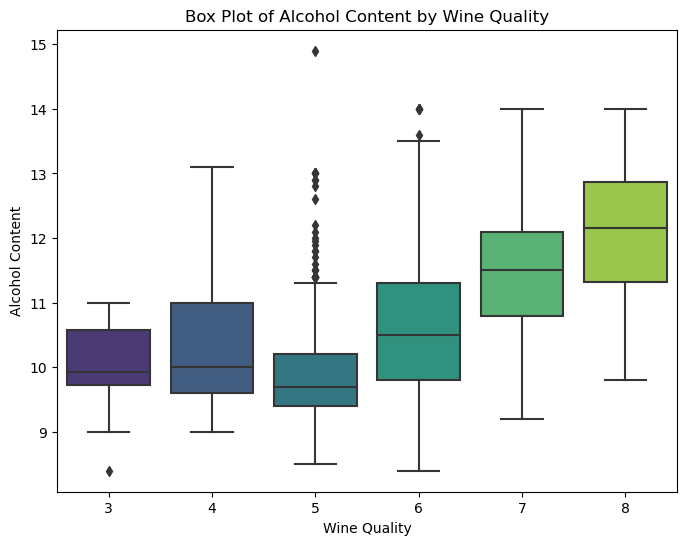

In [64]:
# Assuming 'quality' is the column representing wine quality in the dataset
plt.figure(figsize=(8, 6))
sns.boxplot(x='quality', y='alcohol', data=df_wine, palette='viridis')
plt.title('Box Plot of Alcohol Content by Wine Quality')
plt.xlabel('Wine Quality')
plt.ylabel('Alcohol Content')
plt.show()


##  Clustering Analysis


C:\Users\RAJITH N\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\RAJITH N\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\RAJITH N\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\RAJITH N\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, wh

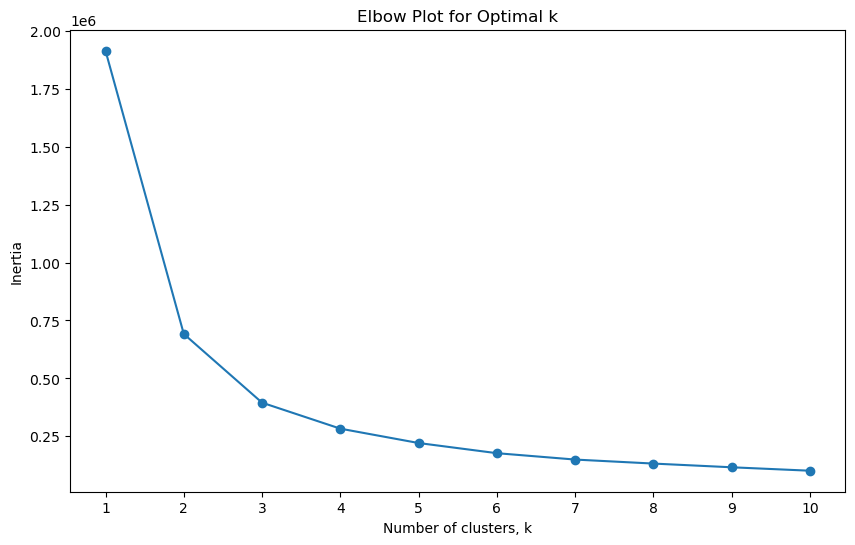

In [65]:
# Determine the inertia for different k values to identify the optimal number of clusters
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_wine.drop('quality', axis=1))  # Excluding the target variable for clustering
    inertia.append(kmeans.inertia_)

# Elbow plot
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, '-o')
plt.title('Elbow Plot for Optimal k')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.show()


###### An elbow plot is created to determine the optimal number of clusters for KMeans clustering based on the inertia values.

C:\Users\RAJITH N\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\RAJITH N\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


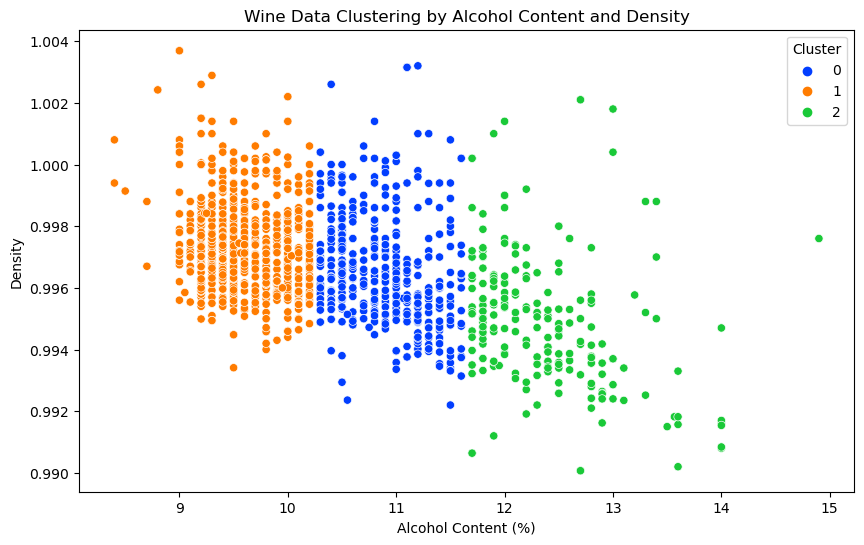

In [66]:
# Applying K-Means Clustering
optimal_k = 3  # Based on the elbow plot, adjust accordingly
kmeans = KMeans(n_clusters=optimal_k)
df_wine['cluster'] = kmeans.fit_predict(df_wine[['alcohol', 'density']])

# Plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='alcohol', y='density', hue='cluster', data=df_wine, palette='bright')
plt.title('Wine Data Clustering by Alcohol Content and Density')
plt.xlabel('Alcohol Content (%)')
plt.ylabel('Density')
plt.legend(title='Cluster')
plt.show()


###### A scatter plot is generated to visualize the clusters formed by KMeans clustering based on alcohol content and volatile acidity.

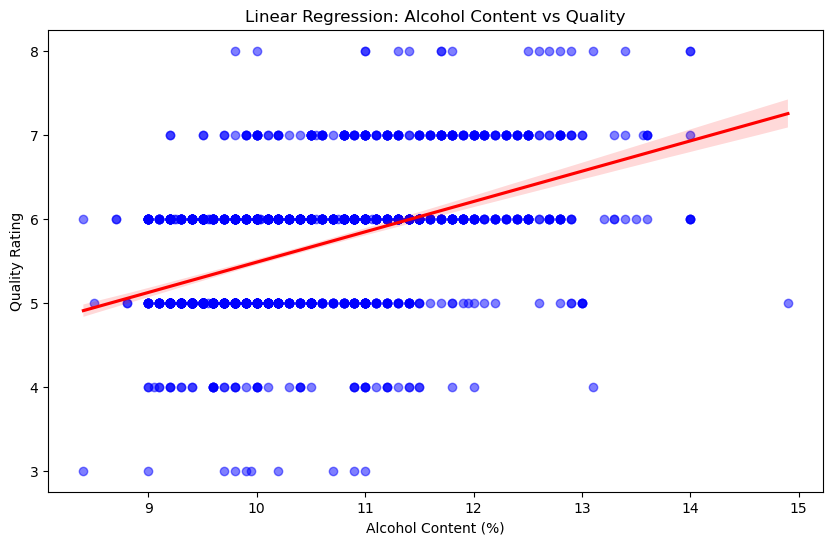

In [67]:
# Prepare data for linear regression
X = df_wine[['alcohol']]  # Predictor
y = df_wine['quality']  # Response

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Plotting the fitting line
plt.figure(figsize=(10, 6))
sns.regplot(x='alcohol', y='quality', data=df_wine, scatter_kws={'color': 'blue', 'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Linear Regression: Alcohol Content vs Quality')
plt.xlabel('Alcohol Content (%)')
plt.ylabel('Quality Rating')
plt.show()

###### A scatter plot is created to visualize the relationship between alcohol content and wine quality, along with a fitted regression line.

In [68]:
# Predicting on the test set
y_pred = model.predict(X_test)

# Calculating Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculating R-squared (R^2) score
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R^2) Score: {r2}')


Mean Squared Error (MSE): 0.4995281340730444
R-squared (R^2) Score: 0.23561797203963386


##### R-squared and Mean Squared Error are computed to evaluate the performance of the regression model in predicting wine quality based on alcohol content.